In [3]:
from exps.yolo_test import Exp

In [2]:
exp = Exp()
# model = exp.get_model()

In [3]:
model = exp.get_model()


                 from  n    params  module                                  arguments                     
  0                -1  1      8800  engine.models.common.Conv               [3, 80, 6, 2, 2]              
  1                -1  1    115520  engine.models.common.Conv               [80, 160, 3, 2]               
  2                -1  4    309120  engine.models.common.C3                 [160, 160, 4]                 
  3                -1  1    461440  engine.models.common.Conv               [160, 320, 3, 2]              
  4                -1  8   2259200  engine.models.common.C3                 [320, 320, 8]                 
  5                -1  1   1844480  engine.models.common.Conv               [320, 640, 3, 2]              
  6                -1 12  13125120  engine.models.common.C3                 [640, 640, 12]                
  7                -1  1   7375360  engine.models.common.Conv               [640, 1280, 3, 2]             
  8                -1  4  19676160  

In [6]:
basic_model = exp.get_model_nonsequential()

Model Summary: 774 layers, 94948607 parameters, 94948607 gradients, 323.9 GFLOPs


In [6]:
dataloader = exp.get_data_loader(4, False)

loading annotations into memory...
Done (t=19.77s)
creating index...
index created!


train: Scanning '/usr/src/PanopticDet/coco/train2017.cache' images and labels... 117266 found, 1021 missing, 1 empty, 0 corrupted: 100%|██████████| 118287/118287 [00:00<?, ?it/s]


in Infinaafskfsadlk


In [4]:
itt = iter(dataloader)
imgs, segs, ins_masks, targets, paths, _ = itt.__next__()

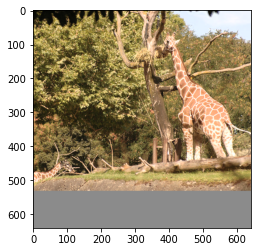

In [25]:
img = imgs[1].permute(1,2,0)
plt.imshow(img)

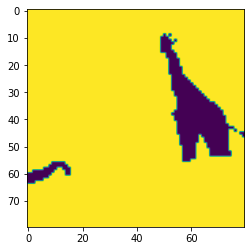

In [26]:
seg = segs[1]
plt.imshow(seg)

torch.Size([2, 160, 160])


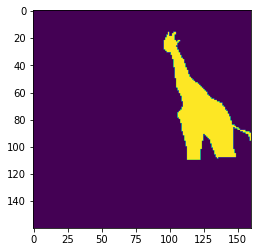

In [29]:
ins_mask = ins_masks[1]
print(ins_mask.shape)
plt.imshow(ins_mask[0])

In [3]:
val_dataloader = exp.get_eval_loader(2, False)

get eval loader
loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


val: Scanning '/usr/src/PanopticDet/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupted: 100%|██████████| 5000/5000 [00:00<00:00, 6742.35it/s]
val: New cache created: /usr/src/PanopticDet/coco/val2017.cache


In [4]:
itt = iter(val_dataloader)
imgs, segs, targets, paths, _ = itt.__next__()

In [7]:
print(imgs.shape)
print(segs.shape)

torch.Size([2, 3, 192, 672])
torch.Size([2, 24, 84])


In [4]:
import time
import torch

In [6]:
dummy_input = torch.zeros((2, 3, 640, 640)).cuda()
model = model.cuda()
model = model.eval()
iteration = 1000
running_time = 0
for i in range(iteration):
    before_time = time.time()
    _, _ = model(dummy_input)
    after_time = time.time()
    running_time += after_time - before_time
    print(running_time/(i+1))


running_time = running_time / iteration
print(running_time)
print("FPS : ", 1/running_time)

0.08531880378723145
0.0544123649597168
0.043670097986857094
0.038281798362731934
0.035695362091064456
0.036754608154296875
0.0375082152230399
0.038060665130615234
0.03848931524488661
0.038824033737182614
0.03912264650518244
0.0393450657526652
0.03950859950138973
0.03970212595803397
0.039825153350830075
0.039977237582206726
0.0401008830350988
0.04019216696421305
0.040281333421405996
0.04036149978637695
0.040428025381905694
0.04049065980044278
0.04055419175521187
0.04060244560241699
0.04065685272216797
0.04070517650017372
0.040746724164044415
0.040782076971871514
0.040828359538111196
0.04085558255513509
0.040879495682254914
0.04090786725282669
0.04094099998474121
0.0409628854078405
0.04098381996154785
0.04100128014882406
0.04102561924908612
0.04103794223383853
0.04105424880981445
0.041069400310516355
0.041100147293835154
0.041125944682529995
0.041135255680527796
0.041166522286155006
0.04117747412787543
0.041196341099946396
0.04121787497337828
0.041231945157051086
0.041242302680502135
0.0

In [7]:
dummy_input = torch.zeros((2, 3, 640, 640)).cuda()
basic_model = basic_model.cuda()
basic_model = basic_model.eval()
iteration = 1000
running_time = 0
for i in range(iteration):
    before_time = time.time()
    _ = basic_model(dummy_input)
    after_time = time.time()
    running_time += after_time - before_time
    print(running_time/(i+1))


running_time = running_time / iteration
print(running_time)
print("FPS : ", 1/running_time)

0.16269302368164062
0.1519714593887329
0.11342684427897136
0.09341657161712646
0.0817563533782959
0.07873574892679851
0.07654554503304618
0.0749022364616394
0.07361984252929688
0.07263655662536621
0.071781418540261
0.07110546032587688
0.07054360096271221
0.07002716405051095
0.06959770520528158
0.06921181082725525
0.06889876197366153
0.06858334276411268
0.0683105744813618
0.06805535554885864
0.06785077140444801
0.06766227158633145
0.06748664897421132
0.06734970211982727
0.06717501640319824
0.06701812377342811
0.06688327259487575
0.06675117356436593
0.06663319160198343
0.06657883326212564
0.06642466206704417
0.06632541120052338
0.06624899488506895
0.06617097293629366
0.06610187802995954
0.06600827640957302
0.06594967842102051
0.06588194872203626
0.06581395711654271
0.06578478217124939
0.0657033978438959
0.0656490893591018
0.06560335048409395
0.06555000760338524
0.06550564236111112
0.0654556077459584
0.06540911755663284
0.06537453830242157
0.06534160399923519
0.06529434204101563
0.0652536

In [15]:
import torch
temp = torch.arange(1, 33).reshape(8,4)
temp[0:3, 0] = 0
temp[3:5, 0] = 1
temp[5:6, 0] = 2
temp[6:, 0] = 3
print(temp)
print("----")
target = []
batch = []
b = 0
for i, t in enumerate(temp):
    if t[0] == b:
        batch.append(t[1:])
    if i+1 < len(temp):
        if temp[i+1, 0] != b:
            target.append(batch)
            batch = []
            b += 1
    else:
        target.append(batch)
print(target)
print(len(target))

tensor([[ 0,  2,  3,  4],
        [ 0,  6,  7,  8],
        [ 0, 10, 11, 12],
        [ 1, 14, 15, 16],
        [ 1, 18, 19, 20],
        [ 2, 22, 23, 24],
        [ 3, 26, 27, 28],
        [ 3, 30, 31, 32]])
----
[[tensor([2, 3, 4]), tensor([6, 7, 8]), tensor([10, 11, 12])], [tensor([14, 15, 16]), tensor([18, 19, 20])], [tensor([22, 23, 24])], [tensor([26, 27, 28]), tensor([30, 31, 32])]]
4


In [19]:
from engine.utils.general import xywh2xyxy
import torch
def yolo2yolact_target(targets):
    '''
    yolo target -> yolact target
    yolo : tensors [img_num, class, x, y, w, h]
    yolact : list of tensors [img1:[num_objs, x1, y1, x2, y2, class], img2:[...]]
    '''
    #* convert xywh -> xyxy format
    convert_target = targets.clone().detach()
    xywhbox = convert_target[:, 2:]
    xyxybox = xywh2xyxy(xywhbox)
    t_cls = convert_target[:, 1:2].clone()
    convert_target[:, 1:5] = xyxybox
    convert_target[:, 5:6] = t_cls
    #* convert tensors -> list of tensors
    yolact_target = []
    batch_target = []
    img_num = 0
    for i, t in enumerate(convert_target):
        if t[0] == img_num:
            batch_target.append(t[1:])
        if i+1 < len(convert_target):
            if convert_target[i+1, 0] != img_num:

                yolact_target.append(torch.stack(batch_target))
                batch_target = []
                img_num += 1
        else:
            yolact_target.append(torch.stack(batch_target))
    
    return yolact_target

In [7]:
itt = iter(dataloader)


In [8]:
imgs, segs, ins_masks, targets, paths, shapes = itt.__next__()

In [20]:
targets

tensor([[0.00000e+00, 4.50000e+01, 4.99999e-01, 6.01613e-01, 9.99998e-01, 5.37750e-01],
        [0.00000e+00, 4.50000e+01, 7.51480e-01, 2.08981e-01, 4.97038e-01, 4.17961e-01],
        [0.00000e+00, 5.00000e+01, 6.83546e-01, 6.41497e-01, 5.94941e-01, 4.61068e-01],
        [0.00000e+00, 4.50000e+01, 3.66945e-01, 3.57910e-01, 7.33890e-01, 7.05712e-01],
        [0.00000e+00, 4.90000e+01, 6.95313e-01, 9.93345e-02, 1.42132e-01, 8.75363e-02],
        [0.00000e+00, 4.90000e+01, 8.47397e-01, 9.68512e-02, 1.09246e-01, 8.78000e-02],
        [0.00000e+00, 4.90000e+01, 7.21153e-01, 1.84538e-01, 1.58066e-01, 1.32650e-01],
        [0.00000e+00, 4.90000e+01, 6.90525e-01, 5.90126e-02, 1.78272e-01, 1.18025e-01],
        [1.00000e+00, 2.30000e+01, 2.12287e-01, 4.05488e-01, 4.24571e-01, 6.80982e-01],
        [1.00000e+00, 2.30000e+01, 9.42010e-01, 8.07612e-01, 1.15979e-01, 1.26475e-01],
        [2.00000e+00, 5.80000e+01, 4.62446e-01, 5.51108e-01, 4.64147e-01, 5.90236e-01],
        [2.00000e+00, 7.50000e+0

In [21]:
yolact_target = yolo2yolact_target(targets)

In [22]:
yolact_target

[tensor([[0.00000e+00, 3.32738e-01, 9.99998e-01, 8.70488e-01, 4.50000e+01],
         [5.02961e-01, 0.00000e+00, 9.99999e-01, 4.17961e-01, 4.50000e+01],
         [3.86076e-01, 4.10963e-01, 9.81017e-01, 8.72030e-01, 5.00000e+01],
         [0.00000e+00, 5.05352e-03, 7.33890e-01, 7.10766e-01, 4.50000e+01],
         [6.24247e-01, 5.55664e-02, 7.66379e-01, 1.43103e-01, 4.90000e+01],
         [7.92774e-01, 5.29512e-02, 9.02020e-01, 1.40751e-01, 4.90000e+01],
         [6.42120e-01, 1.18213e-01, 8.00186e-01, 2.50863e-01, 4.90000e+01],
         [6.01389e-01, 0.00000e+00, 7.79661e-01, 1.18025e-01, 4.90000e+01]]),
 tensor([[1.51992e-06, 6.49968e-02, 4.24572e-01, 7.45979e-01, 2.30000e+01],
         [8.84021e-01, 7.44374e-01, 1.00000e+00, 8.70849e-01, 2.30000e+01]]),
 tensor([[ 0.23037,  0.25599,  0.69452,  0.84623, 58.00000],
         [ 0.28992,  0.48324,  0.59294,  0.83880, 75.00000]]),
 tensor([[ 0.00000,  0.03875,  0.76990,  0.78934, 22.00000]])]

In [24]:
yolact_target[0].shape

torch.Size([8, 5])

In [49]:
from engine.utils.general import scale_coords
shape = shapes[0][0]

tbox = xywh2xyxy(targets[:, 2:6])  # target boxes
scale_coords(imgs[0].shape[1:], tbox, shape, shapes[0][1])

print(tbox)

tensor([[0.00000, 0.09601, 0.00000, 0.94750],
        [0.00000, 0.46612, 0.00000, 1.00000],
        [0.00000, 0.34851, 0.00000, 0.59804],
        [0.00000, 0.35150, 0.00000, 0.50342],
        [0.00000, 0.37677, 0.00000, 0.49854],
        [0.00000, 0.34442, 0.00000, 0.50266],
        [0.00000, 0.34625, 0.00000, 0.50575],
        [0.00000, 0.34132, 0.00000, 0.50519],
        [0.00000, 0.46308, 0.00000, 0.77325],
        [0.00000, 0.28058, 0.00000, 0.44688],
        [0.00000, 0.61371, 0.00000, 0.64855],
        [0.00000, 0.64956, 0.00000, 0.68823],
        [0.00000, 0.69262, 0.00000, 0.75013],
        [0.00000, 0.35523, 0.00000, 0.99985],
        [0.00000, 0.10934, 0.00000, 0.72106],
        [0.00000, 0.65179, 0.00000, 0.73676],
        [0.00000, 0.62479, 0.00000, 0.83139]])


In [7]:
from engine.utils.general import match, make_priors
import torch

In [8]:
anchors = [[10, 13, 16,30, 33,23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]]
anchors = torch.tensor(anchors).float()

In [11]:
anchors = anchors.view(3, -1, 2)

In [12]:
anchors

tensor([[[ 10.,  13.],
         [ 16.,  30.],
         [ 33.,  23.]],

        [[ 30.,  61.],
         [ 62.,  45.],
         [ 59., 119.]],

        [[116.,  90.],
         [156., 198.],
         [373., 326.]]])

In [13]:
anchors[0]

tensor([[10., 13.],
        [16., 30.],
        [33., 23.]])

In [17]:
prior_8 = make_priors(80, 80, anchors[0])

In [18]:
prior_8

tensor([[0.00625, 0.00625, 0.12500, 0.16250],
        [0.00625, 0.00625, 0.20000, 0.37500],
        [0.00625, 0.00625, 0.41250, 0.28750],
        ...,
        [0.99375, 0.99375, 0.12500, 0.16250],
        [0.99375, 0.99375, 0.20000, 0.37500],
        [0.99375, 0.99375, 0.41250, 0.28750]])

In [19]:
prior_16 = make_priors(40, 40, anchors[1])

In [20]:
prior_32 = make_priors(20, 20, anchors[2])

In [22]:
prior_16.shape

torch.Size([4800, 4])

In [23]:
prior_32.shape

torch.Size([1200, 4])

In [24]:
priors = torch.cat([prior_8, prior_16, prior_32], dim=0)

In [25]:
priors.shape

torch.Size([25200, 4])